# Pymaceuticals Inc.
---

###

#Analysis 
• Effectiveness: Capomulin and Ramicane have the lowest means (40.68 and 40.22, respectively), suggesting they might be more effective in reducing the measured outcome compared to other regimens.
• Consistency: Capomulin and Ramicane also have the lowest variances and standard deviations, indicating more consistent results across samples.
• Precision: The SEM values for Capomulin (0.33) and Ramicane (0.32) are the smallest, suggesting that their sample means are more precise estimates of the population mean.
Conclusion
Capomulin and Ramicane appear to be the most effective and consistent drug regimens based on the provided data. They show lower mean values, indicating better performance, and have smaller variances and SEMs, indicating more reliable and precise results.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [3]:
# Checking the number of unique mice
number_of_mice = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {number_of_mice}")


Number of unique mice: 249


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display the duplicate mice
print(duplicate_mice)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [5]:
# Get the duplicate mouse IDs
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()

# Filter the combined DataFrame to get all data for the duplicate mouse IDs
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

# Display the data for the duplicate mouse IDs
print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [6]:
# Create a clean DataFrame by dropping the duplicates
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Display the cleaned DataFrame
print(cleaned_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [7]:
# Checking the number of unique mice in the clean DataFrame
number_of_cleaned_mice = cleaned_data["Mouse ID"].nunique()
print(f"Number of unique mice in the cleaned DataFrame: {number_of_cleaned_mice}")

Number of unique mice in the cleaned DataFrame: 249


## Summary Statistics

In [8]:
# Calculate summary statistics for tumor volume by drug regimen
summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    SEM=lambda x: st.sem(x)  
).reset_index()

# Display the summary statistics DataFrame
print(summary_statistics)


  Drug Regimen       mean     median   variance  standard_deviation       SEM
0    Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
6     Propriva  52.393463  50.909965  43.138803            6.568014  0.525862
7     Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398


In [9]:
# Generate summary statistics using a single line aggregation method
summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    SEM=lambda x: st.sem(x)
).reset_index()

# Display the summary statistics DataFrame
print(summary_statistics)

  Drug Regimen       mean     median   variance  standard_deviation       SEM
0    Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
6     Propriva  52.393463  50.909965  43.138803            6.568014  0.525862
7     Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

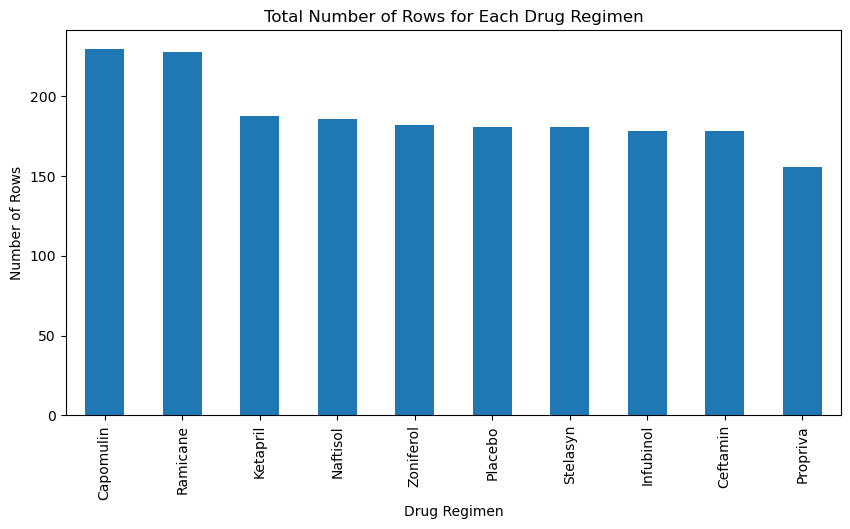

In [10]:
# Count the total number of rows for each drug regimen
regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Generate a bar plot using Pandas
regimen_counts.plot(kind='bar', figsize=(10, 5), title='Total Number of Rows for Each Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Rows')
plt.show()

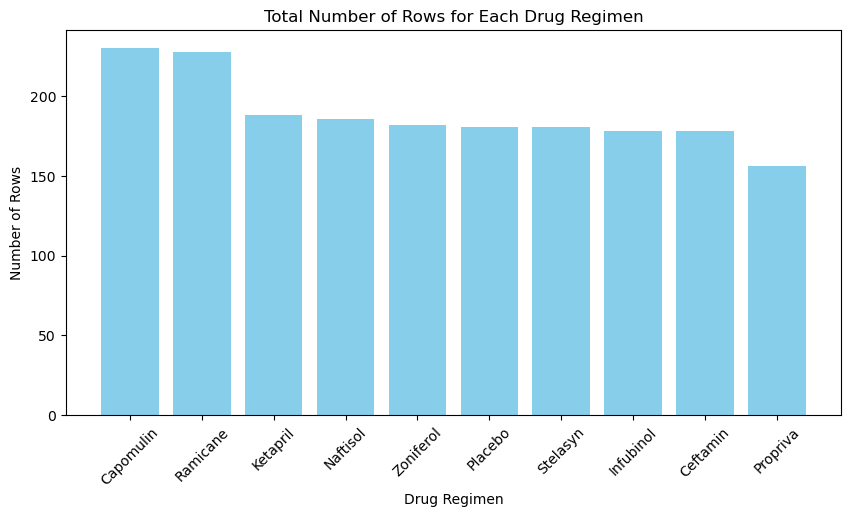

In [11]:
# Count the total number of rows for each drug regimen
regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Generate a bar plot using pyplot
plt.figure(figsize=(10, 5))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

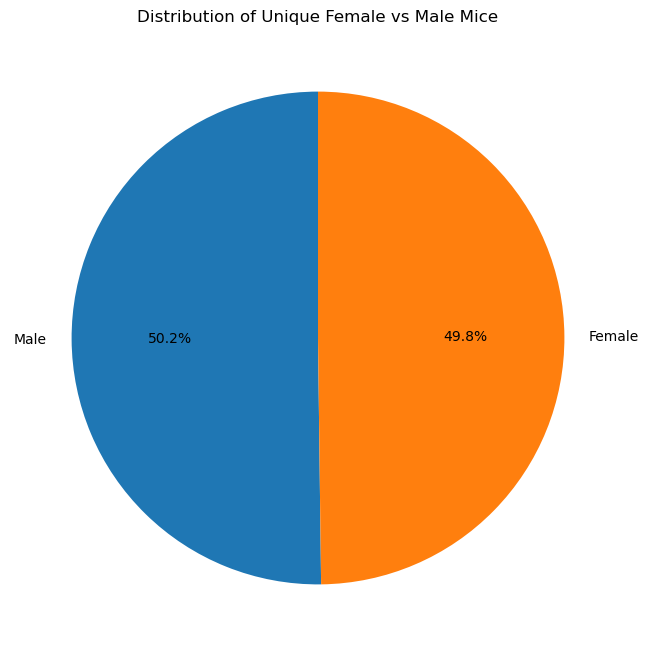

In [12]:
# Get the unique mice with their gender
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique mice for each gender
gender_counts = unique_mice['Sex'].value_counts()

# Generate a pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Distribution of Unique Female vs Male Mice', figsize=(8, 8))
plt.ylabel('')  # Hide the y-label
plt.show()

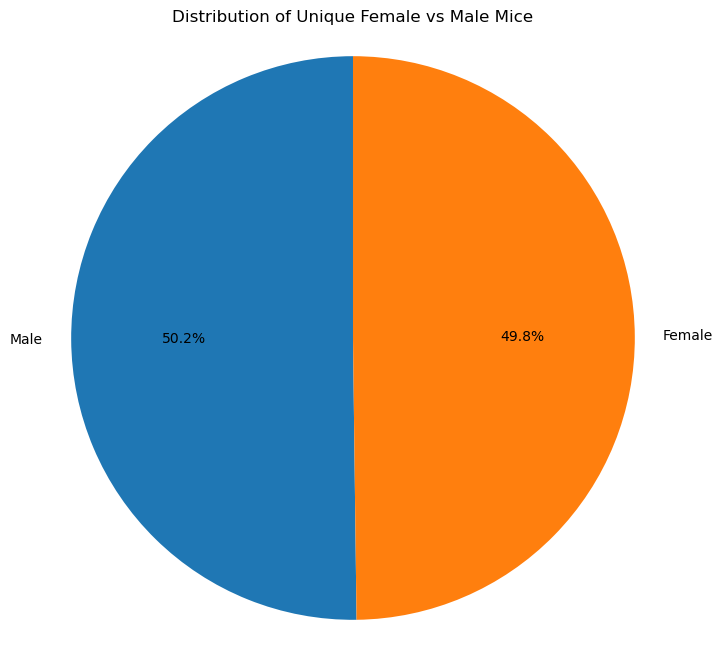

In [13]:
# Get the unique mice with their gender
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique mice for each gender
gender_counts = unique_mice['Sex'].value_counts()

# Generate a pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Unique Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Get the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'])

# Filter for the specified treatment regimens
final_tumor_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the final tumor volumes DataFrame
print(final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']])

    Mouse ID Drug Regimen  Tumor Volume (mm3)  Timepoint
0       a203    Infubinol           67.973419         45
1       a251    Infubinol           65.525743         45
3       a275     Ceftamin           62.999356         45
6       a411     Ramicane           38.407618         45
7       a444     Ramicane           43.047543         45
..       ...          ...                 ...        ...
239     y769     Ceftamin           68.594745         45
240     y793    Capomulin           31.896238         45
241     y865     Ceftamin           64.729837         45
245     z578     Ramicane           30.638696         45
246     z581    Infubinol           62.754451         45

[100 rows x 4 columns]


In [15]:
# Put treatments into a list for the loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to the tumor volume data list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print the results for each treatment
    print(f"{treatment}:")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential Outliers: {tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]}")


Capomulin:
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane:
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol:
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin:
  Lower Bound: 25.355449580000002
  Upper Bound: 87.66645829999999
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 1000x600 with 0 Axes>

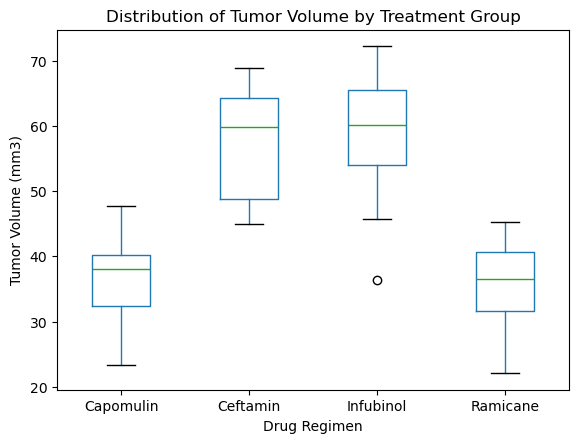

In [16]:
# Create a box plot for the tumor volume distribution by treatment group
plt.figure(figsize=(10, 6))
final_tumor_volumes.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)

# Set the title and labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

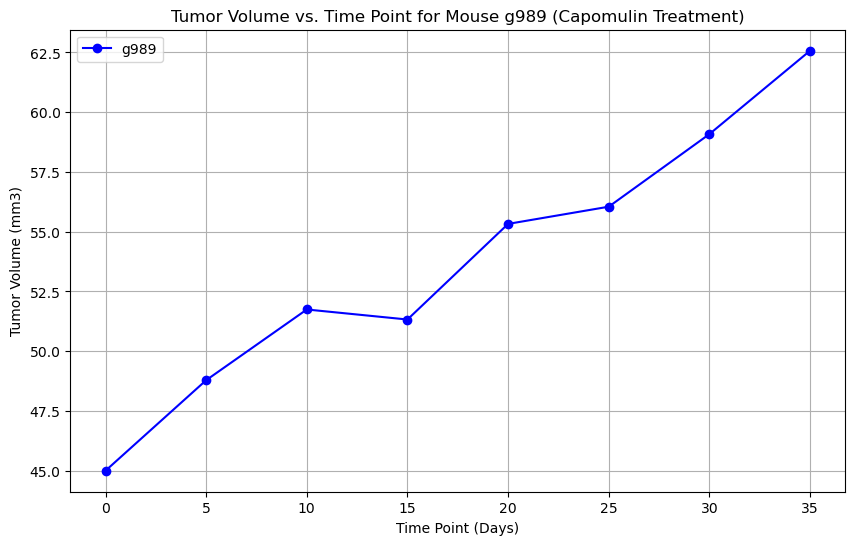

In [17]:
# Select a single mouse treated with Capomulin (for example, "g989")
mouse_id = "g989"  # Replace with the desired mouse ID
mouse_data = cleaned_data[cleaned_data["Mouse ID"] == mouse_id]

# Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='b', label=mouse_id)

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(mouse_data["Timepoint"])  # Set x-ticks to the time points
plt.legend()
plt.grid()

# Show the plot
plt.show()

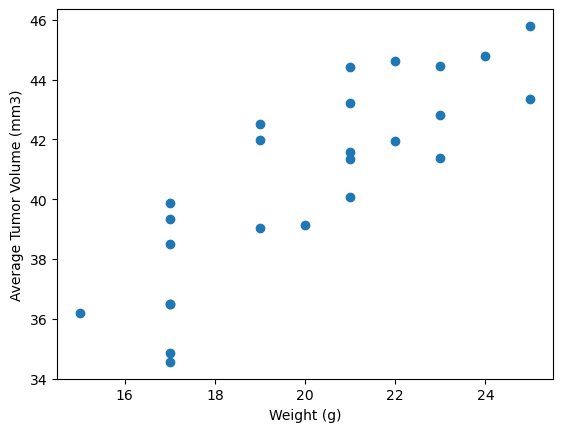

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

Correlation Coefficient: 0.841936342469472


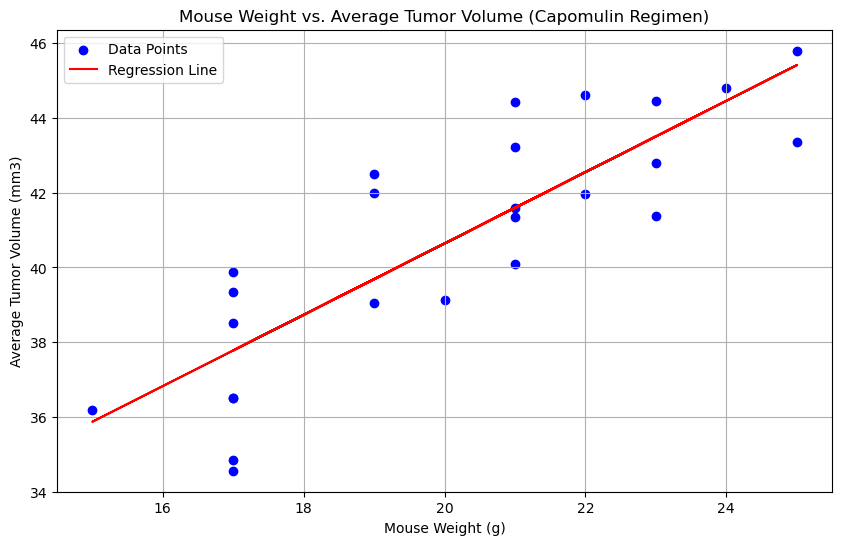

In [18]:
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID").agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Mouse_Weight=('Weight (g)', 'mean')
).reset_index()

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(average_tumor_volume['Mouse_Weight'], average_tumor_volume['Average_Tumor_Volume'])
print(f"Correlation Coefficient: {correlation_coefficient[0]}")

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Mouse_Weight'], average_tumor_volume['Average_Tumor_Volume'])

# Create a linear regression line
regression_line = slope * average_tumor_volume['Mouse_Weight'] + intercept

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Mouse_Weight'], average_tumor_volume['Average_Tumor_Volume'], color='blue', label='Data Points')
plt.plot(average_tumor_volume['Mouse_Weight'], regression_line, color='red', label='Regression Line')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Show the plot
plt.show()